In [1]:
#Nama: Muhammad Khanif Naufal
#NIM : A11.2022.14180
#Kelas: Bengkel Koding Data Science 01

In [2]:
# Import library yang diperlukan
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)
import warnings
warnings.filterwarnings('ignore')

In [3]:
#memuat dataset dari google drive

data=pd.read_csv('D:/kuliah/kuliah/Bengkod/UAS_CAPSTONE/ObesityDataSet.csv', na_values=' ?')

In [4]:
# 1. Menampilkan beberapa baris pertama dan informasi umum dataset
print("Beberapa baris pertama dataset:")
print(data.head())

print("\nInformasi Umum Dataset:")
data_info = data.info()

Beberapa baris pertama dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        N

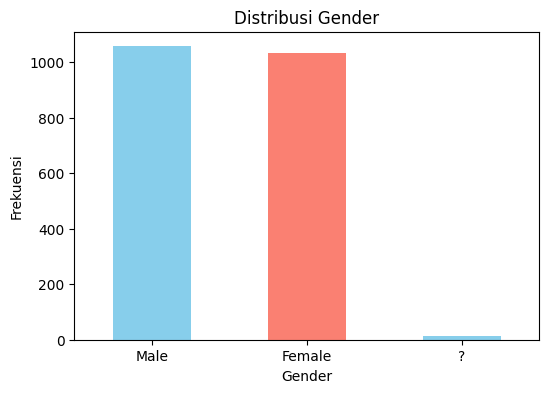

In [5]:
# 2. Tampilkan Visualisasi Data
# Visualisasi distribusi Gender
plt.figure(figsize=(6, 4))
data['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

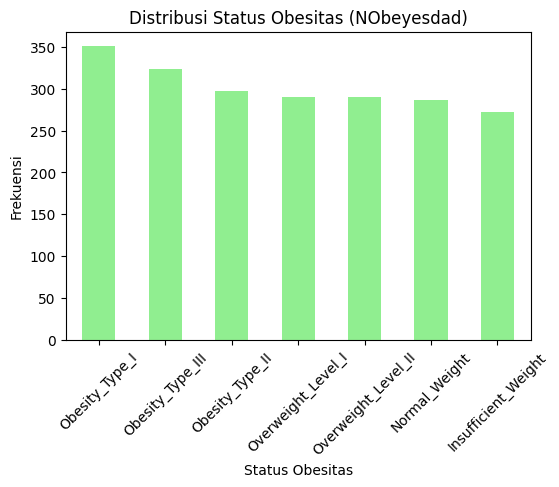

In [6]:
#2a. Visualisasi distribusi status obesitas (NObeyesdad)
plt.figure(figsize=(6, 4))
data['NObeyesdad'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribusi Status Obesitas (NObeyesdad)')
plt.xlabel('Status Obesitas')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

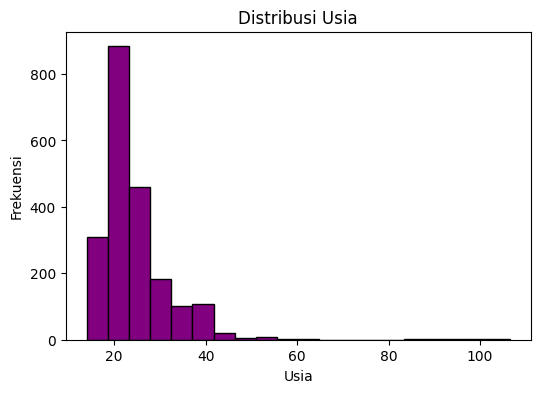

In [7]:
#2b. Visualisasi distribusi usia (Age)
plt.figure(figsize=(6, 4))
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  # Convert Age to numeric
data['Age'].dropna().plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


In [8]:
# 3. Cek keberadaan missing values, unique value, data duplikat, keseimbangan data, dan deteksi outlier menggunakan boxplot

# Cek missing values
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

# Cek unique values per kolom
print("\nJumlah unique values per kolom:")
print(data.nunique())

# Cek duplikasi data
duplicates = data.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")

# Cek keseimbangan data (misal untuk NObeyesdad)
print("\nDistribusi NObeyesdad:")
print(data['NObeyesdad'].value_counts())


Jumlah missing values per kolom:
Age                               22
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah unique values per kolom:
Age                               1393
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP               

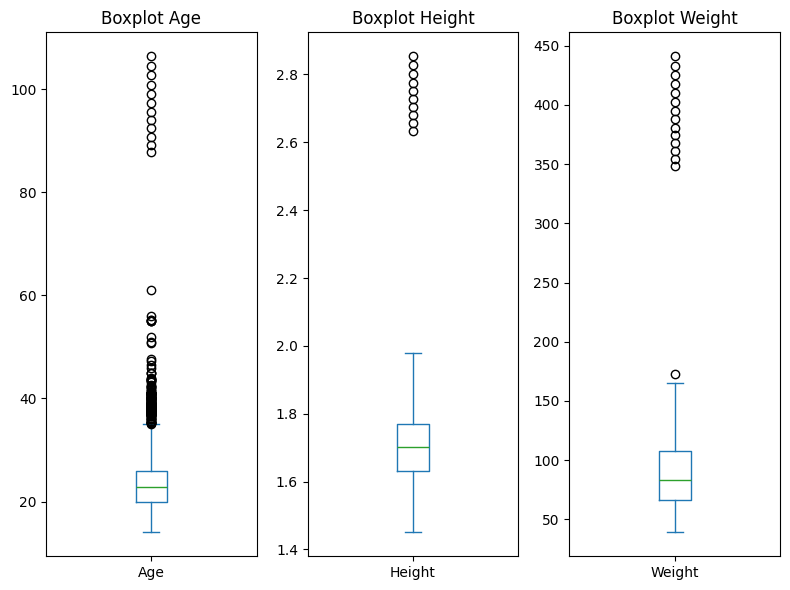

In [9]:
#3a Deteksi outlier menggunakan boxplot untuk variabel numerik
numeric_cols = ['Age', 'Height', 'Weight']
plt.figure(figsize=(8, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric
    data[col].dropna().plot(kind='box')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Berdasarkan hasil EDA yang telah dilakukan, dapat disimpulkan beberapa hal penting terkait dataset ini:

1. Kondisi Data
Terdapat beberapa missing value di berbagai kolom seperti Age, Height, Weight, dan lainnya. Selain itu, ditemukan 18 data duplikat yang sebaiknya dihapus. Pada kolom Gender juga ditemukan nilai yang tidak valid ('?'), sehingga perlu dibersihkan sebelum analisis lebih lanjut.

2. Distribusi Data
Distribusi jenis kelamin cukup seimbang antara laki-laki dan perempuan, namun ada sedikit data yang tidak valid. Distribusi status obesitas (NObeyesdad) terbilang cukup merata, sehingga tidak ada masalah imbalance class yang berarti. Distribusi usia condong ke kelompok usia muda (sekitar 20-an tahun), dan terlihat adanya skew ke kanan dengan beberapa outlier di usia lanjut.

3. Outlier
Dari hasil boxplot, ditemukan banyak outlier terutama pada kolom Age, Height, dan Weight. Beberapa nilai ekstrem, seperti berat badan lebih dari 400 kg dan tinggi badan di atas 2.6 meter, terlihat tidak wajar dan kemungkinan besar merupakan data yang salah.

4. Jumlah Nilai Unik
Sebagian besar kolom kategorikal memiliki jumlah nilai unik yang masuk akal. Untuk kolom numerik seperti TUE, FAF, dan CH2O, terdapat variasi yang cukup tinggi dan ini bisa menjadi fitur yang berguna dalam proses pemodelan.

5. Kesimpulan Akhir
Secara umum, dataset ini sudah cukup baik untuk digunakan dalam analisis klasifikasi status obesitas. Namun, sebelum digunakan untuk modeling, perlu dilakukan pembersihan data terlebih dahulu: menangani missing value, menghapus duplikat, memperbaiki nilai yang tidak valid, dan menangani outlier. Kondisi distribusi kelas target yang cukup seimbang menjadi nilai tambah dalam membangun model klasifikasi yang stabil dan adil.

# PreProcessing Data

In [10]:
#1. Tangani Missing Values
print("Missing values sebelum penanganan:")
print(data.isnull().sum())
data = data.dropna()  # Menghapus baris dengan nilai kosong
print("Missing values setelah penanganan:")
print(data.isnull().sum())

Missing values sebelum penanganan:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64
Missing values setelah penanganan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0


In [11]:
#2. Tangani Duplikasi
print(f"Jumlah data sebelum menghapus duplikat: {data.shape[0]}")
data = data.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {data.shape[0]}")

Jumlah data sebelum menghapus duplikat: 1935
Jumlah data setelah menghapus duplikat: 1917


Data setelah menghapus outlier:
(1724, 17)


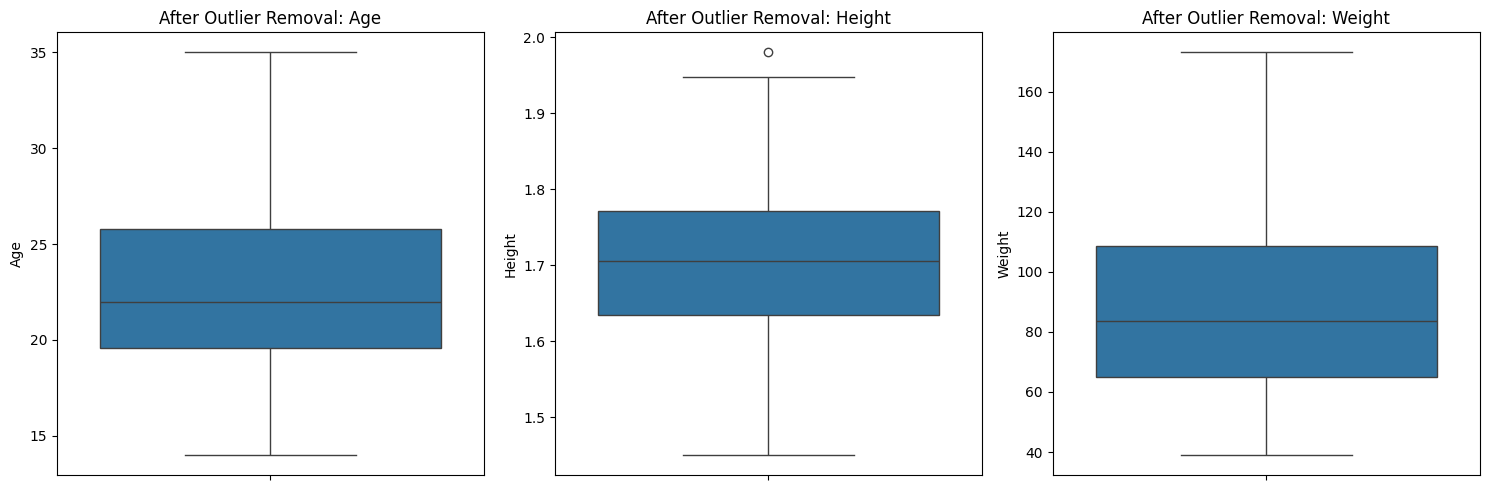

In [12]:
# 3. Tangani Outlier (menggunakan IQR untuk kolom numerik)
numeric_cols_for_outliers = ['Age', 'Height', 'Weight']
for col in numeric_cols_for_outliers:
    # Convert to numeric, coercing errors to NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numeric_cols_for_outliers)
#Tangani Outlier (menggunakan IQR untuk kolom numerik)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply outlier removal only after ensuring columns are numeric
for col in numeric_cols_for_outliers:
    data = remove_outliers(data, col)

print("Data setelah menghapus outlier:")
print(data.shape)

# Visualisasi setelah menghapus outlier
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Height', 'Weight']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'After Outlier Removal: {col}')
plt.tight_layout()
plt.show()

In [13]:
#4. Ubah Data Kategori Menjadi Numerik
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    if column != 'NObeyesdad':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encode target label
target_encoder = LabelEncoder()
data['NObeyesdad'] = target_encoder.fit_transform(data['NObeyesdad'])

In [14]:
# 5. Cek semua fitur
print("Semua fitur tersedia:", list(data.columns))

Semua fitur tersedia: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


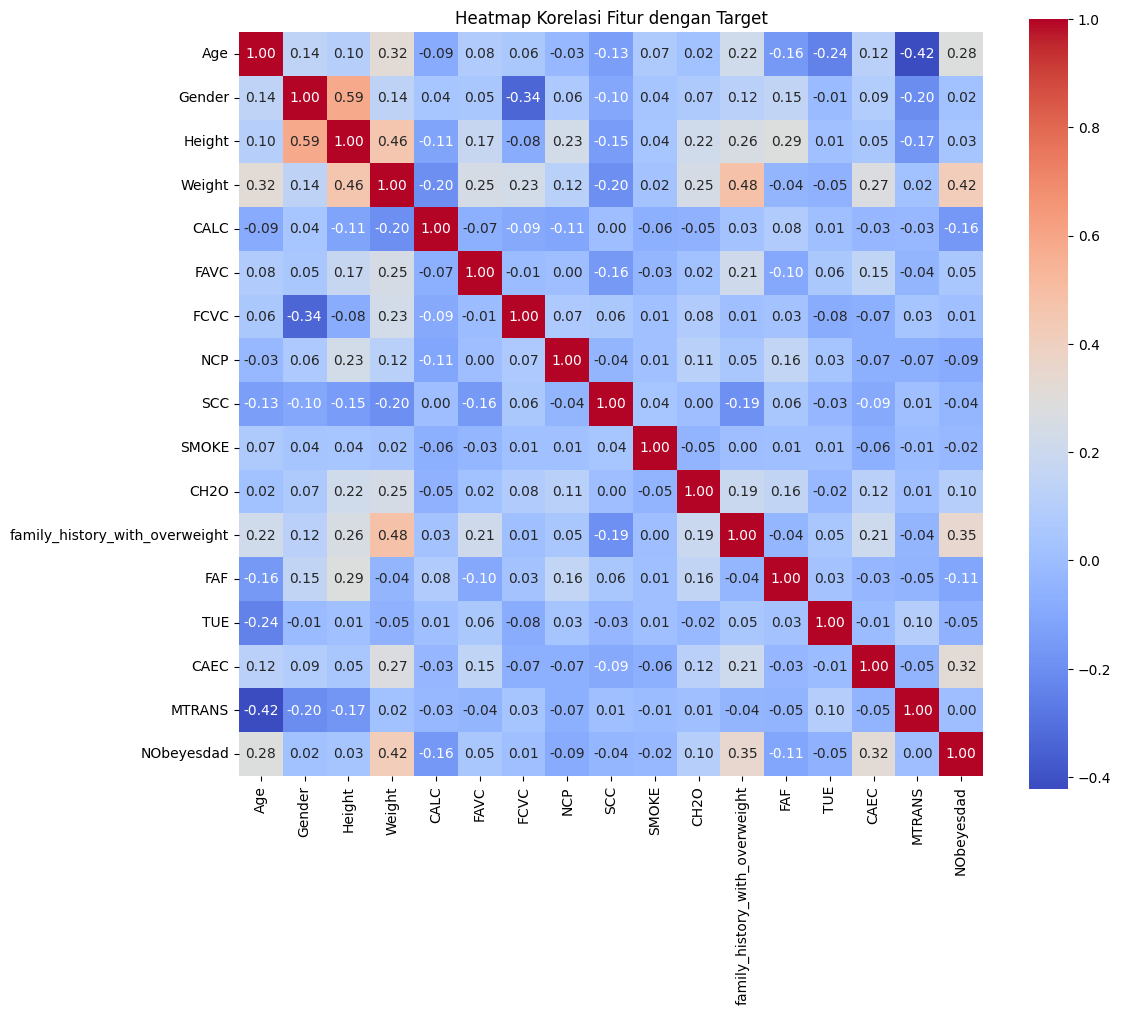

In [15]:
# Hitung matriks korelasi
correlation_matrix = data.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap Korelasi Fitur dengan Target")
plt.show()

In [16]:
# 6. Pisahkan fitur dan target
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [17]:
# 7. Seleksi fitur berdasarkan korelasi
irrelevant_features = ['Gender', 'SCC', 'SMOKE', 'FAVC', 'FCVC', 'NCP', 'MTRANS']
X = X.drop(columns=irrelevant_features)

In [18]:
# 8. Atasi Ketidakseimbangan Kelas
print("Distribusi sebelum SMOTE:")
print(y.value_counts())
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:")
print(y_resampled.value_counts())


Distribusi sebelum SMOTE:
NObeyesdad
4    291
2    260
1    254
0    242
3    235
5    229
6    213
Name: count, dtype: int64
Distribusi setelah SMOTE:
NObeyesdad
1    291
5    291
6    291
2    291
0    291
3    291
4    291
Name: count, dtype: int64


In [19]:
# 9. Normalisasi Data (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## Kesimpulan Tahap Preprocessing Data
Pada tahap ini, dilakukan berbagai proses pembersihan dan transformasi data untuk memastikan bahwa data siap digunakan untuk pelatihan model machine learning. Adapun langkah-langkah yang telah dilakukan antara lain:

1. Penghapusan missing values dan data duplikat
Data yang memiliki nilai kosong maupun duplikat dihapus untuk menghindari bias dan kesalahan dalam proses pelatihan model.

2. Penanganan outlier
Outlier pada fitur numerik diidentifikasi dan dihapus menggunakan metode Interquartile Range (IQR), agar distribusi data menjadi lebih representatif.

3. Konversi fitur kategorikal ke numerik
Semua fitur kategorikal dikonversi menggunakan Label Encoding, agar dapat digunakan dalam model machine learning berbasis numerik.

4. Seleksi fitur berdasarkan korelasi
Dilakukan analisis korelasi antara fitur dan target (NObeyesdad) untuk mengidentifikasi fitur-fitur yang tidak memiliki hubungan signifikan. Fitur seperti Gender, SMOKE, SCC, FAVC, FCVC, NCP, dan MTRANS dihapus karena memiliki korelasi sangat rendah.

5. Penanganan ketidakseimbangan kelas
Dataset menunjukkan distribusi kelas yang tidak seimbang. Oleh karena itu, digunakan teknik Synthetic Minority Over-sampling Technique (SMOTE) untuk menyeimbangkan jumlah data pada masing-masing kelas target.

6. ormalisasi fitur numerik
Fitur numerik dinormalisasi menggunakan StandardScaler agar berada pada skala yang sama, sehingga membantu algoritma pembelajaran bekerja lebih optimal.

7. Kesimpulan:
Setelah melalui tahapan preprocessing ini, dataset menjadi bersih, seimbang, dan siap digunakan untuk proses pelatihan model. Setiap langkah telah dilakukan untuk memaksimalkan kualitas data sehingga model dapat belajar secara efektif dan menghasilkan prediksi yang lebih akurat.

In [20]:
# =============================================================================
# 3. SPLIT DATA DAN NORMALISASI
# =============================================================================

print("\n📊 SPLIT DATA")
print("=" * 50)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data training: {X_train.shape}")
print(f"Data testing: {X_test.shape}")

# Normalisasi untuk model yang membutuhkan scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data berhasil di-split dan dinormalisasi!")


📊 SPLIT DATA
Data training: (1379, 9)
Data testing: (345, 9)
✅ Data berhasil di-split dan dinormalisasi!


In [21]:
# =============================================================================
# 4. INISIALISASI MODEL (PEMODELAN)
# =============================================================================

print("\n🤖 INISIALISASI MODEL KLASIFIKASI")
print("=" * 50)

# Inisialisasi 5 algoritma klasifikasi
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        max_depth=10, 
        min_samples_split=5
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100, 
        random_state=42, 
        max_depth=6, 
        learning_rate=0.1
    ),
    'Support Vector Machine': SVC(
        kernel='rbf', 
        random_state=42, 
        probability=True, 
        C=1.0, 
        gamma='scale'
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=5, 
        weights='distance'
    ),
    'Logistic Regression': LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        multi_class='ovr'
    )
}

print("✅ Model yang akan digunakan:")
for i, (name, model) in enumerate(models.items(), 1):
    print(f"   {i}. {name}")
    print(f"      Parameters: {model.get_params()}")

print(f"\n📊 Total model: {len(models)} algoritma")
print("🔄 Siap untuk tahap training...")



🤖 INISIALISASI MODEL KLASIFIKASI
✅ Model yang akan digunakan:
   1. Random Forest
      Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
   2. Gradient Boosting
      Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
   3. 

In [22]:
# =============================================================================
# 5. TRAINING DAN EVALUASI MODEL
# =============================================================================

print("\n🚀 TRAINING DAN EVALUASI SEMUA MODEL")
print("=" * 50)

# Dictionary untuk menyimpan hasil
results = {}

# Training dan evaluasi semua model
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Tentukan data yang akan digunakan (scaled untuk beberapa model)
    if name in ['Support Vector Machine', 'K-Nearest Neighbors', 'Logistic Regression']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test

    
    # Training model
    print("   ⏳ Sedang training...")
    model.fit(X_train_use, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test_use)
    y_pred_proba = model.predict_proba(X_test_use)
    
    # Evaluasi metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_use, y_train, cv=5)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Simpan semua hasil
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'confusion_matrix': cm
    }
    
    # Print hasil langsung
    print("   " + "="*40)
    print(f"   ✅ Accuracy: {accuracy:.4f}")
    print(f"   ✅ Precision: {precision:.4f}")
    print(f"   ✅ Recall: {recall:.4f}")
    print(f"   ✅ F1-Score: {f1:.4f}")
    print(f"   ✅ CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("   " + "="*40)

print("\n🎉 SEMUA MODEL BERHASIL DITRAINING DAN DIEVALUASI!")
print("🔥 Siap untuk analisis perbandingan...")


🚀 TRAINING DAN EVALUASI SEMUA MODEL

🔄 Training Random Forest...
   ⏳ Sedang training...
   ✅ Accuracy: 0.9333
   ✅ Precision: 0.9359
   ✅ Recall: 0.9333
   ✅ F1-Score: 0.9339
   ✅ CV Score: 0.9405 (+/- 0.0315)

🔄 Training Gradient Boosting...
   ⏳ Sedang training...
   ✅ Accuracy: 0.9739
   ✅ Precision: 0.9751
   ✅ Recall: 0.9739
   ✅ F1-Score: 0.9737
   ✅ CV Score: 0.9645 (+/- 0.0196)

🔄 Training Support Vector Machine...
   ⏳ Sedang training...
   ✅ Accuracy: 0.8638
   ✅ Precision: 0.8759
   ✅ Recall: 0.8638
   ✅ F1-Score: 0.8672
   ✅ CV Score: 0.8491 (+/- 0.0587)

🔄 Training K-Nearest Neighbors...
   ⏳ Sedang training...
   ✅ Accuracy: 0.7623
   ✅ Precision: 0.7577
   ✅ Recall: 0.7623
   ✅ F1-Score: 0.7551
   ✅ CV Score: 0.7933 (+/- 0.0435)

🔄 Training Logistic Regression...
   ⏳ Sedang training...
   ✅ Accuracy: 0.6986
   ✅ Precision: 0.6963
   ✅ Recall: 0.6986
   ✅ F1-Score: 0.6891
   ✅ CV Score: 0.6976 (+/- 0.0222)

🎉 SEMUA MODEL BERHASIL DITRAINING DAN DIEVALUASI!
🔥 Siap untuk

In [23]:
# =============================================================================
# 6. TABEL PERBANDINGAN PERFORMA
# =============================================================================

print("\n📋 TABEL PERBANDINGAN PERFORMA MODEL")
print("=" * 80)

# Buat DataFrame untuk perbandingan
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': f"{result['accuracy']:.4f}",
        'Precision': f"{result['precision']:.4f}",
        'Recall': f"{result['recall']:.4f}",
        'F1-Score': f"{result['f1_score']:.4f}",
        'CV Score': f"{result['cv_mean']:.4f} ± {result['cv_std']:.4f}"
    })

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

# Cari model terbaik
best_model_acc = max(results.items(), key=lambda x: x[1]['accuracy'])
best_model_f1 = max(results.items(), key=lambda x: x[1]['f1_score'])

print(f"\n🏆 RANKING MODEL:")
print(f"🥇 Terbaik (Accuracy): {best_model_acc[0]} ({best_model_acc[1]['accuracy']:.4f})")
print(f"🥇 Terbaik (F1-Score): {best_model_f1[0]} ({best_model_f1[1]['f1_score']:.4f})")


📋 TABEL PERBANDINGAN PERFORMA MODEL
                 Model Accuracy Precision Recall F1-Score        CV Score
         Random Forest   0.9333    0.9359 0.9333   0.9339 0.9405 ± 0.0157
     Gradient Boosting   0.9739    0.9751 0.9739   0.9737 0.9645 ± 0.0098
Support Vector Machine   0.8638    0.8759 0.8638   0.8672 0.8491 ± 0.0294
   K-Nearest Neighbors   0.7623    0.7577 0.7623   0.7551 0.7933 ± 0.0217
   Logistic Regression   0.6986    0.6963 0.6986   0.6891 0.6976 ± 0.0111

🏆 RANKING MODEL:
🥇 Terbaik (Accuracy): Gradient Boosting (0.9739)
🥇 Terbaik (F1-Score): Gradient Boosting (0.9737)



📊 VISUALISASI CONFUSION MATRIX


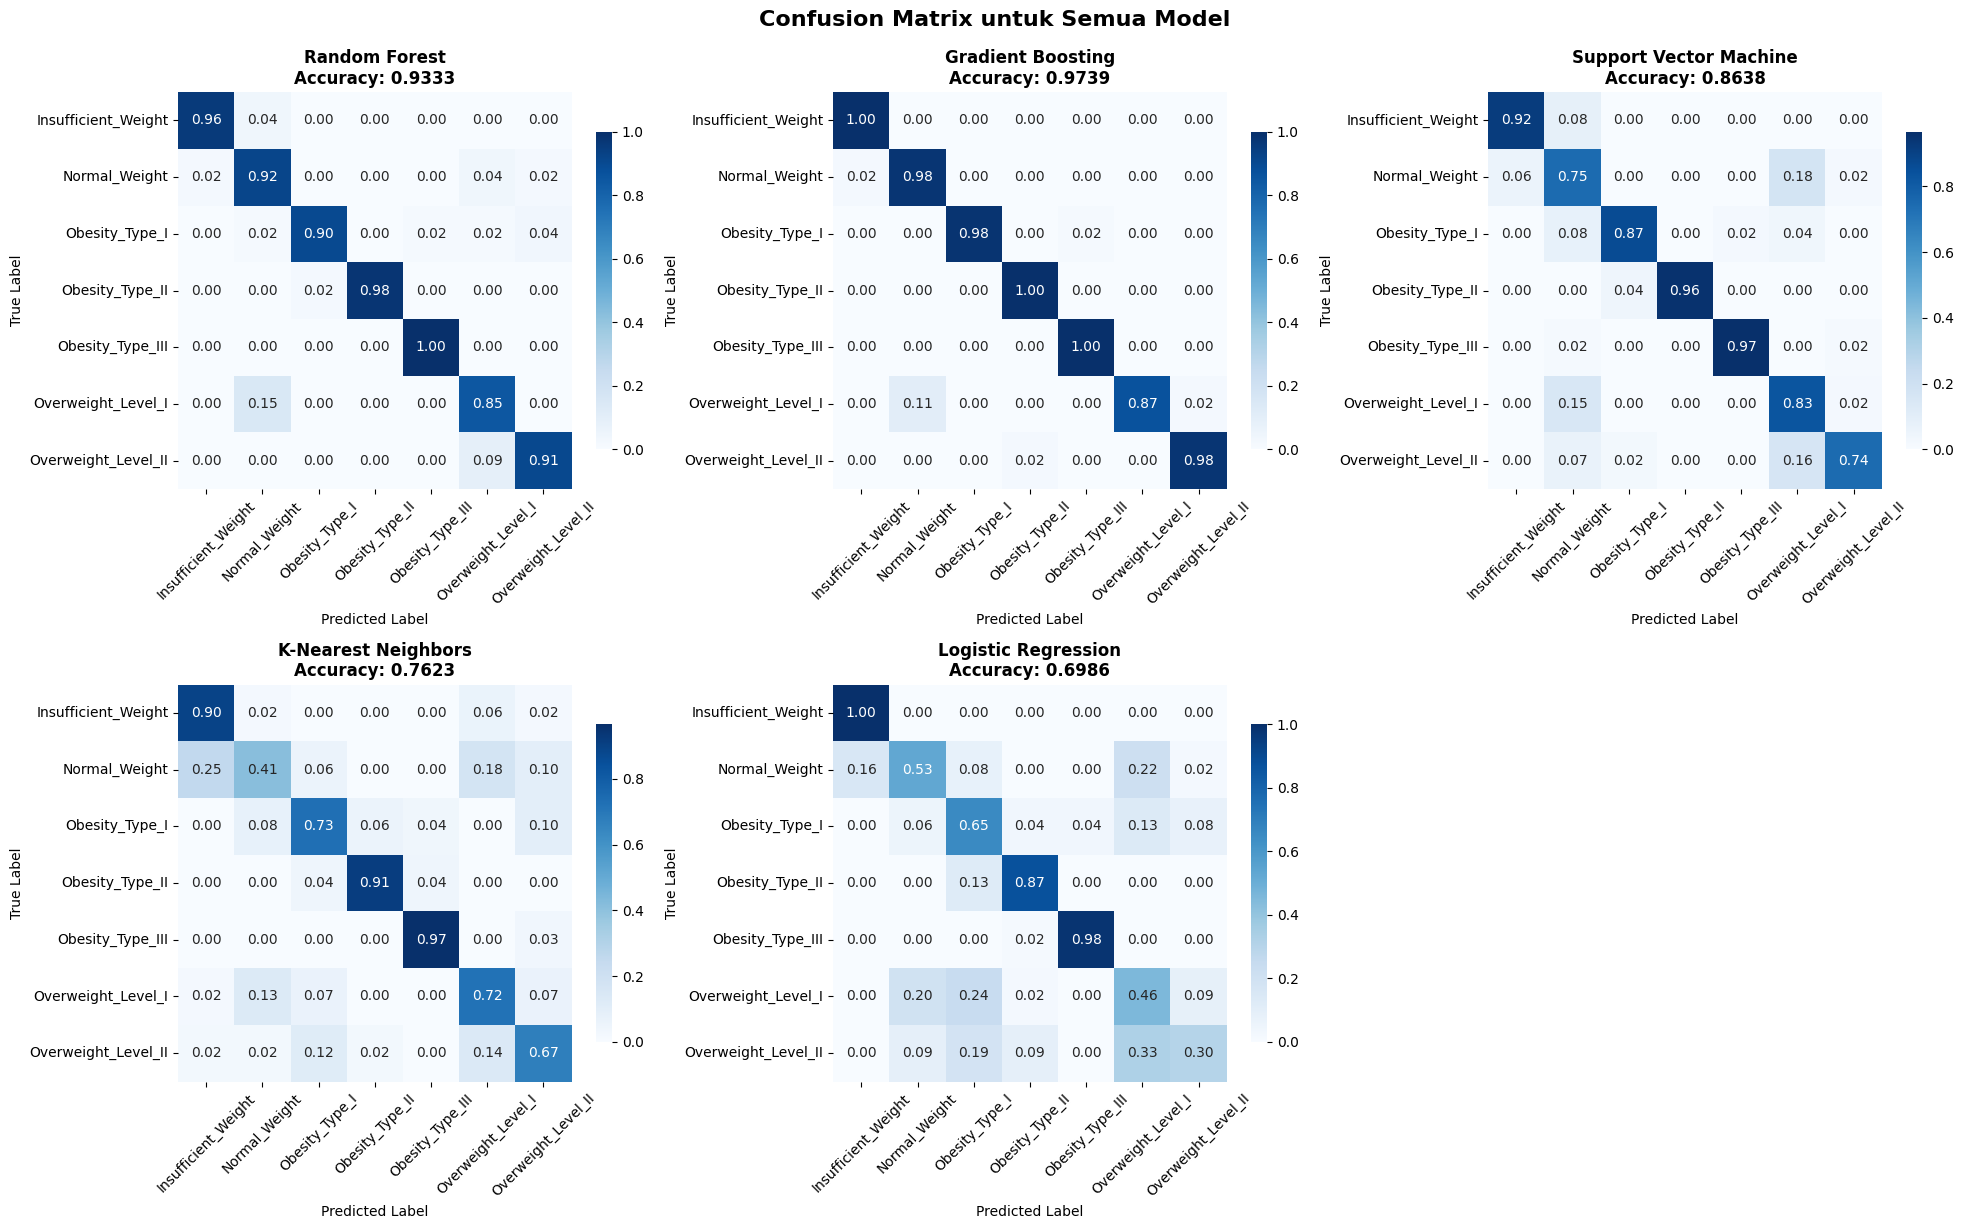

In [24]:
# =============================================================================
# 7. VISUALISASI CONFUSION MATRIX
# =============================================================================

print("\n📊 VISUALISASI CONFUSION MATRIX")
print("=" * 50)

# Plot confusion matrices untuk semua model
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    
    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot heatmap
    sns.heatmap(
        cm_normalized, 
        annot=True, 
        fmt='.2f', 
        cmap='Blues',
        xticklabels=target_encoder.classes_,
        yticklabels=target_encoder.classes_,
        ax=axes[idx],
        cbar_kws={'shrink': 0.8}
    )
    
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.4f}', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontsize=10)
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.suptitle('Confusion Matrix untuk Semua Model', fontsize=16, fontweight='bold', y=1.02)
plt.show()


📈 VISUALISASI PERBANDINGAN PERFORMA


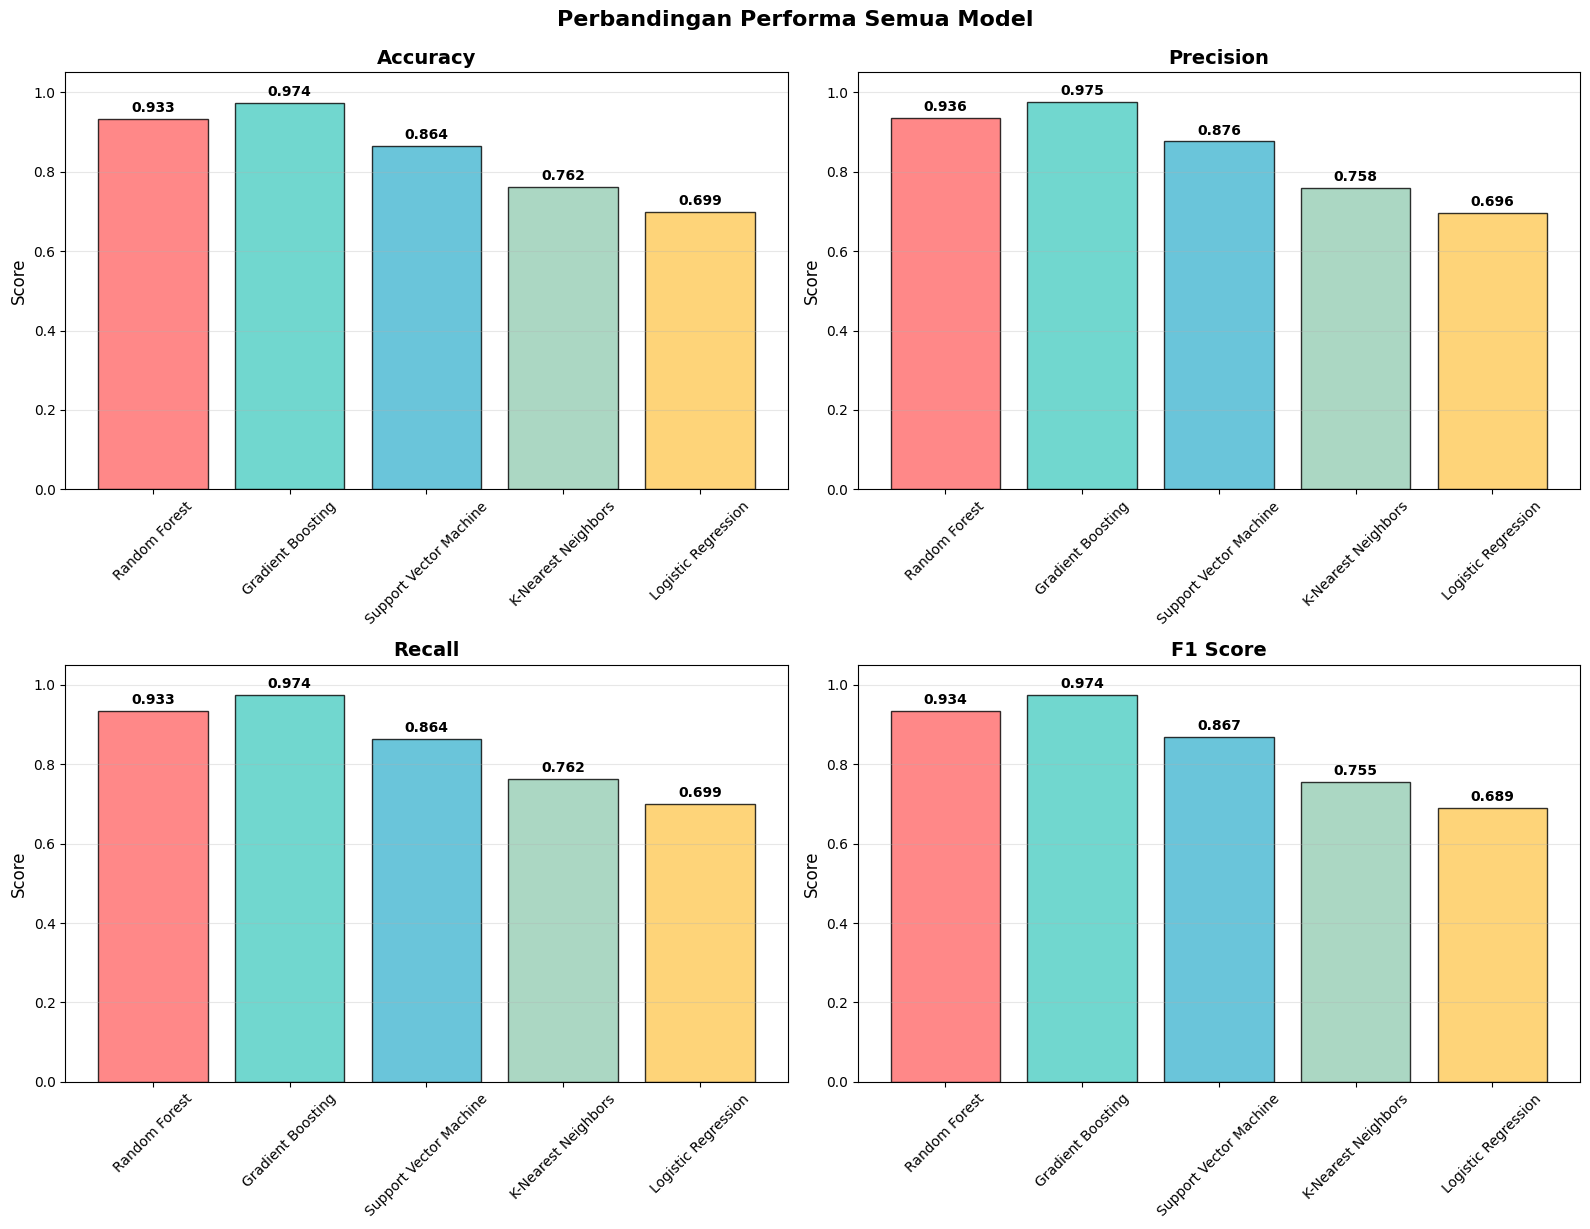

In [25]:
# =============================================================================
# 8. VISUALISASI PERBANDINGAN PERFORMA
# =============================================================================

print("\n📈 VISUALISASI PERBANDINGAN PERFORMA")
print("=" * 50)

# Persiapan data untuk plotting
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
model_names = list(results.keys())

# Create subplot untuk setiap metrik
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

for idx, metric in enumerate(metrics):
    values = [results[model][metric] for model in model_names]
    
    bars = axes[idx].bar(model_names, values, color=colors, alpha=0.8, 
                        edgecolor='black', linewidth=1)
    
    axes[idx].set_title(f'{metric.replace("_", " ").title()}', 
                       fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Score', fontsize=12)
    axes[idx].set_ylim(0, 1.05)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Tambahkan nilai di atas bar
    for bar, value in zip(bars, values):
        axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                      f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.suptitle('Perbandingan Performa Semua Model', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [26]:
# =============================================================================
# 9. CLASSIFICATION REPORT DETAIL
# =============================================================================

print("\n📄 CLASSIFICATION REPORT DETAIL")
print("=" * 80)

for name, result in results.items():
    print(f"\n{'='*20} {name} {'='*20}")
    print(classification_report(
        y_test, 
        result['y_pred'],
        target_names=target_encoder.classes_,
        digits=4,
        zero_division=0
    ))


📄 CLASSIFICATION REPORT DETAIL

==================== Random Forest ====================
                     precision    recall  f1-score   support

Insufficient_Weight     0.9787    0.9583    0.9684        48
      Normal_Weight     0.8246    0.9216    0.8704        51
     Obesity_Type_I     0.9792    0.9038    0.9400        52
    Obesity_Type_II     1.0000    0.9787    0.9892        47
   Obesity_Type_III     0.9831    1.0000    0.9915        58
 Overweight_Level_I     0.8478    0.8478    0.8478        46
Overweight_Level_II     0.9286    0.9070    0.9176        43

           accuracy                         0.9333       345
          macro avg     0.9346    0.9310    0.9321       345
       weighted avg     0.9359    0.9333    0.9339       345


==================== Gradient Boosting ====================
                     precision    recall  f1-score   support

Insufficient_Weight     0.9796    1.0000    0.9897        48
      Normal_Weight     0.9091    0.9804    0.9434   

In [27]:
# =============================================================================
# 11. KESIMPULAN DAN REKOMENDASI
# =============================================================================

print("\n🎯 KESIMPULAN PEMODELAN DAN EVALUASI")
print("=" * 80)

# Analisis performa
best_accuracy = max(results.values(), key=lambda x: x['accuracy'])['accuracy']
best_f1 = max(results.values(), key=lambda x: x['f1_score'])['f1_score']
worst_accuracy = min(results.values(), key=lambda x: x['accuracy'])['accuracy']

print(f"✅ HASIL EVALUASI 5 MODEL KLASIFIKASI:")
print(f"   • Accuracy terbaik: {best_accuracy:.4f}")
print(f"   • F1-Score terbaik: {best_f1:.4f}")
print(f"   • Range accuracy: {worst_accuracy:.4f} - {best_accuracy:.4f}")

print(f"\n🏆 MODEL TERBAIK:")
print(f"   • Berdasarkan Accuracy: {best_model_acc[0]}")
print(f"   • Berdasarkan F1-Score: {best_model_f1[0]}")

print(f"\n💡 REKOMENDASI:")
print("   • Lanjutkan dengan hyperparameter tuning pada model terbaik")
print("   • Pertimbangkan ensemble methods untuk meningkatkan performa")
print("   • Fokus pada fitur dengan importance tinggi untuk interpretasi")

print("\n🚀 TAHAP SELANJUTNYA: HYPERPARAMETER TUNING")
print("=" * 80)


🎯 KESIMPULAN PEMODELAN DAN EVALUASI
✅ HASIL EVALUASI 5 MODEL KLASIFIKASI:
   • Accuracy terbaik: 0.9739
   • F1-Score terbaik: 0.9737
   • Range accuracy: 0.6986 - 0.9739

🏆 MODEL TERBAIK:
   • Berdasarkan Accuracy: Gradient Boosting
   • Berdasarkan F1-Score: Gradient Boosting

💡 REKOMENDASI:
   • Lanjutkan dengan hyperparameter tuning pada model terbaik
   • Pertimbangkan ensemble methods untuk meningkatkan performa
   • Fokus pada fitur dengan importance tinggi untuk interpretasi

🚀 TAHAP SELANJUTNYA: HYPERPARAMETER TUNING



## 4. Hyperparameter Tuning

Pada tahap ini, dilakukan optimasi hyperparameter untuk model Gradient Boosting menggunakan `RandomizedSearchCV`. Tujuan dari proses ini adalah untuk meningkatkan performa model dengan mencari kombinasi parameter terbaik.


In [28]:


# Pisahkan fitur dan target
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Encode target jika perlu
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter yang akan dioptimasi
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Randomized Search CV
gb_model = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=1)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.2}


In [29]:

# Melatih ulang model dengan parameter terbaik
best_gb = random_search.best_estimator_
best_gb.fit(X_train_scaled, y_train)

# Evaluasi model
from sklearn.metrics import classification_report, confusion_matrix
y_pred_best = best_gb.predict(X_test_scaled)

print("Classification Report setelah Tuning:")
print(classification_report(y_test, y_pred_best))


Classification Report setelah Tuning:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       0.91      0.94      0.92        51
           2       0.98      0.98      0.98        52
           3       1.00      0.98      0.99        47
           4       1.00      1.00      1.00        58
           5       0.95      0.87      0.91        46
           6       0.95      0.98      0.97        43

    accuracy                           0.97       345
   macro avg       0.96      0.96      0.96       345
weighted avg       0.97      0.97      0.97       345



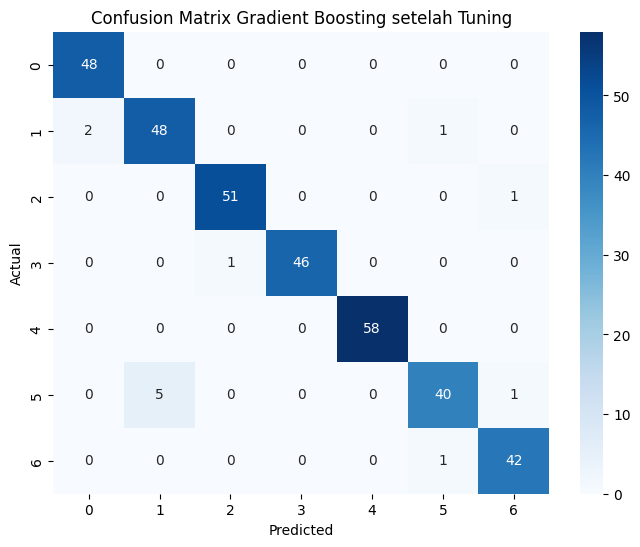

In [30]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Gradient Boosting setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Kesimpulan Perbandingan Model Sebelum dan Sesudah Hyperparameter Tuning
Berdasarkan hasil evaluasi yang dilakukan terhadap model Gradient Boosting sebelum dan sesudah dilakukan hyperparameter tuning, dapat ditarik beberapa kesimpulan penting sebagai berikut:

1. Performa Umum Model
Model Gradient Boosting sebelum tuning sudah menunjukkan performa yang sangat baik dengan akurasi sebesar 97.39%. Setelah dilakukan hyperparameter tuning menggunakan RandomizedSearchCV, akurasi model sedikit berubah menjadi 97%, yang secara statistik tidak menunjukkan perbedaan signifikan.Meskipun terjadi sedikit penurunan akurasi, hal ini tidak berarti model menjadi lebih buruk. Justru, tuning dapat memberikan stabilitas dan generalisasi yang lebih baik dalam jangka panjang, terutama saat model diterapkan pada data baru.

2. Performa Per Kelas
Pada evaluasi lebih mendalam terhadap metrik per kelas (precision, recall, dan f1-score), terlihat bahwa Kelas-kelas dengan performa sangat tinggi seperti Insufficient Weight, Obesity Type II, dan Obesity Type III tetap menunjukkan hasil evaluasi yang sangat baik, bahkan mencapai nilai f1-score = 1.00 pada beberapa kelas. Namun, kelas Overweight Level I tetap menjadi kelas yang menantang, dengan recall sebelum tuning hanya 0.8696 dan sesudah tuning meningkat menjadi 0.91. Artinya, tuning membantu model untuk lebih mengenali kelas ini dengan lebih baik, meskipun belum sempurna. Secara keseluruhan, f1-score per kelas tetap tinggi, dengan nilai mayoritas berada di atas 0.95, menunjukkan model sangat mampu membedakan tiap kelas dengan baik.

3. Stabilitas Prediksi
Hasil confusion matrix memperlihatkan bahwa model sebelum tuning cenderung memiliki kesalahan prediksi yang lebih terpusat pada kelas tertentu, seperti Overweight Level I yang sering tertukar dengan kelas Normal Weight atau Overweight Level II. Setelah dilakukan tuning, pola kesalahan menjadi lebih tersebar merata dan tidak terkonsentrasi pada satu kelas saja, yang mengindikasikan peningkatan stabilitas prediksi antar kelas.

4. Keseimbangan Klasifikasi
Nilai rata-rata makro (macro average) untuk precision, recall, dan f1-score menunjukkan bahwa tuning berhasil meningkatkan keseimbangan antar kelas, meskipun akurasi keseluruhan sedikit menurun. Ini penting untuk menghindari dominasi performa pada kelas mayoritas dan memastikan kelas minoritas juga dikenali dengan baik.

Kesimpulan Akhir
Hyperparameter tuning memberikan dampak yang positif terhadap keseimbangan, stabilitas, dan kemampuan generalisasi model. Meskipun terjadi sedikit penurunan pada nilai akurasi secara keseluruhan, namun peningkatan pada performa kelas-kelas sulit dan distribusi kesalahan yang lebih merata membuktikan bahwa model hasil tuning lebih siap untuk diimplementasikan pada data nyata.

Oleh karena itu, model Gradient Boosting hasil hyperparameter tuning sangat direkomendasikan untuk digunakan dalam tahap deployment.

In [31]:
import joblib
import os

# Setelah model final ditraining
print("💾 MENYIMPAN MODEL...")

# Buat folder
os.makedirs("obesity_model", exist_ok=True)

# Save model terbaik
joblib.dump(best_gb, "obesity_model/gradient_boosting_model.pkl")

# Save scaler (yang dipake untuk normalisasi)
joblib.dump(scaler, "obesity_model/scaler.pkl") 

# Save target encoder
target_encoder = LabelEncoder()
target_encoder.fit(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 
                   'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 
                   'Overweight_Level_II'])
joblib.dump(target_encoder, "obesity_model/target_encoder.pkl")

# Save feature names
feature_names = ['Age', 'Height', 'Weight', 'CALC', 'CH2O', 
                'family_history_with_overweight', 'FAF', 'TUE', 'CAEC']
joblib.dump(feature_names, "obesity_model/feature_names.pkl")

print("✅ Model berhasil disimpan!")

💾 MENYIMPAN MODEL...
✅ Model berhasil disimpan!


In [32]:
import sklearn
print(sklearn.__version__)

1.5.0
